# PHYS 434 HW3 Angela Zhou

In [1]:
# import the libraries
%matplotlib inline
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import hist
from matplotlib.pyplot import xticks
import scipy
from scipy import stats
from scipy.stats import expon
from scipy.stats import erlang
from scipy.stats import norm
from scipy.stats import cauchy
from scipy.stats import rayleigh

## Problem 1
### Set up
I copied the truth tables for NN and NA below. I modified the entry for True Person identified as NA bird in the NA truth table because otherwise the total number of True Person won't match 52. <br>

|  | True Bird | True Person |   |   | True Bird | True Person 
| :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| NN Bird | 45 | 5 |   | NA Bird | 47 | 10 |
| NN Person | 3 | 47 |   | NA Person | 1 | 42 |

### 1a) Which algorithm makes the fewest mistakes?

We have two algorithms in this problem and we are given the truth table for each of the algorithm; one algorithm is the neural network (NN), and the other one is the new algorithm (NA). <br>
From the truth tables we can see that NN miscategorized 8 cases among 48 birds and 52 people which the NA miscategorized 12 cases. Therefore, NN makes fewer mistakes.

### 1b) Which algorithm is better for the zoo? Explain.

NA is better for the zoo. <br>
In the zoo, we are trying to keep birds from escaping the aviary by locking the aviary door when a bird is trying to escape. Compared to letting birds escape, locking a person in for 30 extra seconds is a smaller problem and we can trade it off in order to get a less chance of birds escaping. In this case, false bird identification is not so bad, but false person identification which leads to birds escaping is what we are trying to avoid. <br>
Therefore, we want to choose the algorithm that has a lower probability of false person identification between the two. From the truth table above, we can see that NN misidentified 3 birds to be person out of 48 birds while NA only misidentified 1 birds to be person. The probability of NA having false person identification is lower compare to NN.

### 1c) During the pandemic the number of visitors plummets, and it is only the zoo keeper visiting. So instead of 52% of the photos taken at the aviary door being people, it is now only 1%. Make new truth tables for both algorithms.

In [2]:
# calculate the numbers that go into the truth table 
birds = 99
person = 1

# calculate probabilities for NN
p_NN_birdBeingPerson = 3/48
p_NN_personBeingBird = 5/52

# calculation probabilities for NA
p_NA_birdBeingPerson = 1/48
p_NA_personBeingBird = 10/52

## calculate entries in the table
# NN
NN_21 = round(p_NN_birdBeingPerson * birds)
NN_11 = round(birds - NN_21)
NN_12 = round(p_NN_personBeingBird * person)
NN_22 = round(person - NN_12)
# NA
NA_21 = round(p_NA_birdBeingPerson * birds)
NA_11 = round(birds - NA_21)
NA_12 = round(p_NA_personBeingBird * person)
NA_22 = round(person - NA_12)

# print out the results
print(NN_11, NN_12, NN_21, NN_22)
print(NA_11, NA_12, NA_21, NA_22)
print("Check the truth table below for the meaning of these numbers.")

93 0 6 1
97 0 2 1
Check the truth table below for the meaning of these numbers.


In the next cell, the left side of the table is the truth table for NN, and the right side is the truth table for NA.

|  | True Bird | True Person |   |   | True Bird | True Person 
| :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| NN Bird | 93 | 0 |   | NA Bird | 97 | 0 |
| NN Person | 6 | 1 |   | NA Person | 2 | 1 |

## Problem 2
### 2a) What is the pdf of the sum of two identical exponential distributions?

The pdf of the sum of two identical exponential distribution is the Erlang distribution.<br>
I first looked up and read about exponential distributions from different references, for example, [Exponential distribution on Wikipedia](https://en.wikipedia.org/wiki/Exponential_distribution#Sum_of_two_independent_exponential_random_variables). In section 2.8 on the Wikipedia page, it specifically talks about the sum of two independent exponential random variables, and the result of the sum of two identical exponential distributions is an Erlang distribution with shape k = 2. <br>
I then looked up the Erlang distribution [here](https://en.wikipedia.org/wiki/Erlang_distribution). It says exponential distribution is a simplified case of the Erlang distribution with shape k = 1, which is also a special case of the [gamma distribution](https://en.wikipedia.org/wiki/Gamma_distribution). For gamma distributions, if the shape parameter k is a positive integer, then the distribution represents an Erlang distribution. <br>
At last, I checked the [Relationships among 35 distributions](https://canvas.uw.edu/courses/1401649/files?preview=68974548) chart posted on canvas page. From the chart we can see clearly how the exponential distribution, the Erlang distribution, and the gamma distribution are related to one another. This confirms the relationships stated above. <br>

I will plot the sum of two identical exponential distributions and the pdf of the Erlang distribution in the cell below. From the plot, we can see how well the Erlang distribution fits the sum of two exponential distributions.

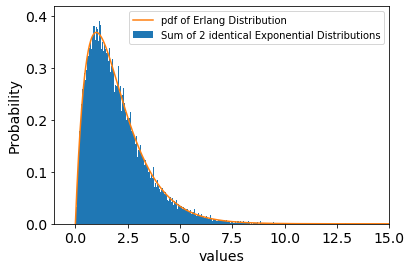

In [3]:
## plot the sum of two identical exponential distributuion in hist
## and plot the pdf of an Erlang distribution to compare

# create a random expon distribution
e1 = expon.rvs(size = 100000) 
e2 = expon.rvs(size = 100000)
# calculate the sum of two identical expon distributions
d = e1 + e2

# create a pdf for Erlang distribution
x = np.linspace(0,15,1000)
er = erlang.pdf(x,a=2)

# plot a histogram of the sum of 2 expon distributions 
fig, ax = plt.subplots(1, 1) # create a figure
ax.hist(d, bins = 1000, density=True, label='Sum of 2 identical Exponential Distributions'); 
ax.legend();
ax.plot(x,er, label = "pdf of Erlang Distribution");
ax.legend();
ax.set_xlim(-1,15);
plt.tick_params(labelsize = 14) # sets tick parameter for the plot, in this case, the label size
ax.set_xlabel("values",fontsize = 14)
ax.set_ylabel("Probability", fontsize = 14)
plt.show()

### 2b) What is the pdf of the ratio of two zero-mean unity variance normal distributions  X1/X2 ?

The pdf of the ratio of two zero-mean unity variance normal distributions X1/X2 is the Standard Cauchy distribution. <br>
Using the [Relationships among 35 distributions](https://canvas.uw.edu/courses/1401649/files?preview=68974548) chart posted on canvas page, we can see that taking the ratio of two standard normal distributions gives us the Stand Cauchy distribution. <br>
Checking the [Normal Distribution Wikipedia page](https://en.wikipedia.org/wiki/Normal_distribution#Combination_of_two_or_more_independent_random_variables) in section 3.3 Combination of two independent random variables, it also gives us the same result; the pdf of the ratio of two standard normal distribition is a Cauchy distribution with zero-mean and unity variance, which is the Standard [Cauchy distribution](https://en.wikipedia.org/wiki/Cauchy_distribution#Related_distributions). <br>

I will plot the ratio of two standard normal distributions along with a pdf curve of the Standard Cauchy distribution in the cell below for comparison.

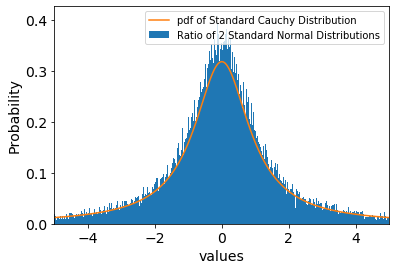

In [4]:
## plot the ratio of two standard normal distributions in hist
## plot the pdf of a standard cauchy

# create two gaus with mean = 0, var = 1
g1 = norm.rvs(size = 100000)
g2 = norm.rvs(size = 100000)

# take the ratio between the 2 gaus above
ratio = g1/g2

# calculate the pdf of a standard cauchy
x = np.linspace(-5, 5, 1000)
cau = cauchy.pdf(x)

# plot
fig, ax = plt.subplots(1, 1) # create a figure
ax.hist(ratio, bins = 1000, range = (-5,5), density=True, label='Ratio of 2 Standard Normal Distributions'); 
ax.legend();
ax.plot(x,cau, label = "pdf of Standard Cauchy Distribution");
ax.legend();
ax.set_xlim(-5,5);
plt.tick_params(labelsize = 14) # sets tick parameter for the plot, in this case, the label size
ax.set_xlabel("values",fontsize = 14)
ax.set_ylabel("Probability", fontsize = 14)
plt.show()

### 2c) So far we have looked at 1D probability distributions, but it is possible to have a multi-dimensional vector distribution. A simple first introduction is the 2D Guassian; it looks like a smeared spot. Mathematically this is given by  Xi^+Yj^  where both  X  and  Y  are drawn from 1D Gaussian distributions. If I measure the amplitude of this vector, what is its pdf? (Hint, the amplitude is always positive.)

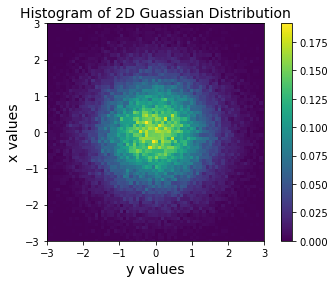

In [5]:
## plot 2d gaussian
x = norm.rvs(size = 100000)
y = norm.rvs(size = 100000)
a = np.vstack((x, y))
a.shape
fig, ax = plt.subplots(1, 1)
h = ax.hist2d(a[0,:],a[1,:],bins=100, density=True);
ax.set_aspect('equal', 'box')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.title("Histogram of 2D Guassian Distribution", fontsize = 14);
plt.ylabel("x values", fontsize = 14);
plt.xlabel("y values", fontsize = 14);
plt.colorbar(h[3], ax=ax);

The pdf of the magnitude of this vector is a [Rayleigh Distribution](https://en.wikipedia.org/wiki/Rayleigh_distribution). <br>
On the [Wikipedia page for Normal Distribution](https://en.wikipedia.org/wiki/Normal_distribution#Combination_of_two_independent_random_variables), I found that in section 3.3 Combination of two independent random variables, it says the Euclidean norm of two independent standard normal random variables with mean 0 and variance 1 has the Rayleigh distribution. <br>
In the next cell, I will plot a histogram of the magnitude of the vector along with the pdf of Rayleigh distribution. We can see that the pdf of the Rayleigh distribution fits the magnitude of the vector very well.

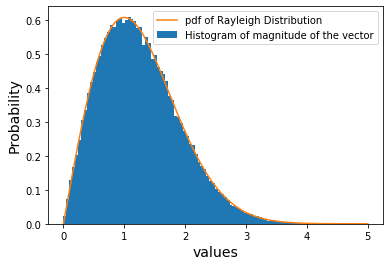

In [6]:
# plot the amplitude of the distribution above as a histogram
x = norm.rvs(size = 100000)
y = norm.rvs(size = 100000)
mag = np.sqrt(x**2 + y**2)
plt.hist(mag, bins = 100, density = True, label = "Histogram of magnitude of the vector");
plt.legend();
# plot the pdf of a Rayleigh distribution
x = np.linspace(0,5,1000)
ray = rayleigh.pdf(x)
plt.plot(x,ray, label = "pdf of Rayleigh Distribution");
plt.legend();
plt.xlabel("values",fontsize = 14);
plt.ylabel("Probability", fontsize = 14);